# Sur les avantages familiaux

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from openfisca_matplotlib import graphs

In [6]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
import openfisca_france    # module décrivant le système socio-fiscal français

TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français 

In [7]:
salaire_imposable_maximal = 80000

In [8]:
def couple_avec_enfants(nombre_enfants = 0, year = 2014):
    enfant = [dict(
        birth = date(2005, 1, 1),
        )]
    enfants = enfant * nombre_enfants
    simulation = tax_benefit_system.new_scenario().init_single_entity(
        axes = [
            dict(
                count = 100,
                min = 0,
                max = salaire_imposable_maximal * 3,
                name = 'sal',
                ),
            ],
        period = "{}:3".format(year-2),
        parent1 = dict(
            birth = date(1980, 1, 1),
            ),
        parent2 = dict(
            birth = date(1980, 1, 1)
            ),
        enfants = enfants,
        menage = dict(
            loyer = 1000 * 3,
            so = 4,
            ),
        ).new_simulation(debug = True)
    return simulation

## Gain lié à l'enfant marginal

In [9]:
def gain_enfant_marginal(rang_enfant, variable = "revdisp", year = 2014):
    assert rang_enfant >= 1
    situation_initiale = couple_avec_enfants(rang_enfant-1, year)
    situation_finale = couple_avec_enfants(rang_enfant, year)
    revdisp_initial = situation_initiale.calculate("revdisp", period = year)
    revdisp_final = situation_finale.calculate("revdisp", period = year)
    return revdisp_final - revdisp_initial

NameError: name 'couple_avec_enfant' is not defined

In [10]:
couple_0_enfant = couple_avec_enfants(nombre_enfants = 0)
salaire_imposable = couple_0_enfant.calculate('sal', period = 2014)[:200:2] 
# salaire imposable est une variable associée à l'entité individu

(0, 80000)

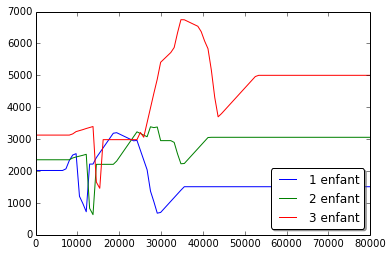

In [10]:
fig = plt.figure()
for rang_enfant in range(1, 4):
    plt.plot(salaire_imposable, gain_enfant_marginal(rang_enfant, year = 2014), label = "{} enfant".format(rang_enfant))
plt.legend(loc = 4, shadow=True, fancybox=True)
plt.xlim([0,salaire_imposable_maximal])

Exercice: Faire le même graphe en utilisant une boucle

(0, 80000)

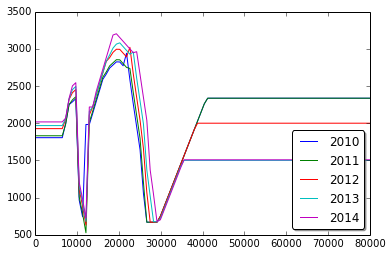

In [12]:
fig = plt.figure()
rang_enfant = 1
for year in range(2010, 2015):
    plt.plot(salaire_imposable, gain_enfant_marginal(rang_enfant, year = year), label = "{}".format(year))
plt.legend(loc = 4, shadow=True, fancybox=True)
plt.xlim([0, salaire_imposable_maximal])

(0, 80000)

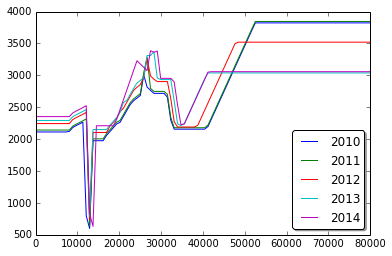

In [51]:
fig = plt.figure()
rang_enfant = 2
for year in range(2010, 2015):
    plt.plot(salaire_imposable, gain_enfant_marginal(rang_enfant, year = year), label = "{}".format(year))
plt.legend(loc = 4, shadow=True, fancybox=True)
plt.xlim([0, salaire_imposable_maximal])

(0, 80000)

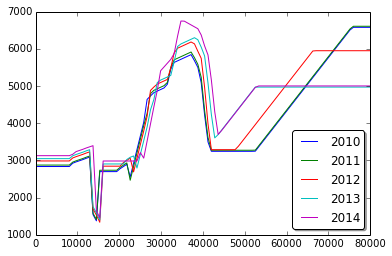

In [8]:
fig = plt.figure()
rang_enfant = 3
for year in range(2010, 2015):
    plt.plot(salaire_imposable, gain_enfant_marginal(rang_enfant, year = year), label = "{}".format(year))
plt.legend(loc = 4, shadow=True, fancybox=True)
plt.xlim([0, salaire_imposable_maximal])

(0, 80000)

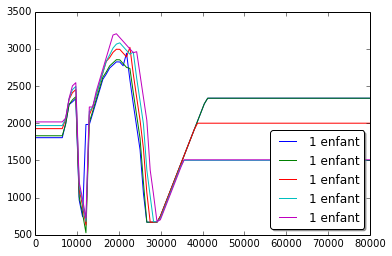

In [9]:
fig = plt.figure()
rang_enfant = 1
for year in range(2010, 2015):
    plt.plot(salaire_imposable, gain_enfant_marginal(rang_enfant, year = year), label = "{} enfant".format(rang_enfant))
plt.legend(loc = 4, shadow=True, fancybox=True)
plt.xlim([0, salaire_imposable_maximal])

(0, 80000)

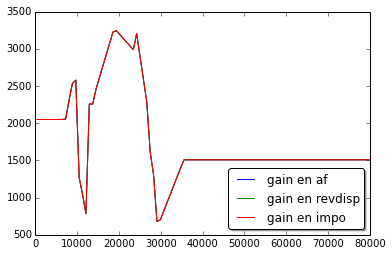

In [16]:
fig = plt.figure()
rang_enfant = 1
year = 2015
for variable in ['af', 'revdisp', 'impo']: 
    plt.plot(salaire_imposable, gain_enfant_marginal(rang_enfant, variable = variable, year = year),
             label = "gain en {}".format(variable))
plt.legend(loc = 4, shadow=True, fancybox=True)
plt.xlim([0, salaire_imposable_maximal])

(0, 80000)

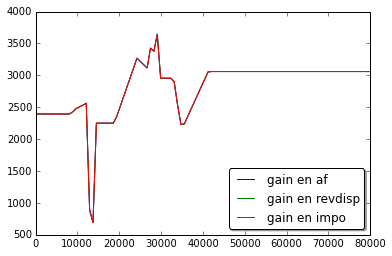

In [17]:
fig = plt.figure()
rang_enfant = 2
year = 2015
for variable in ['af', 'revdisp', 'impo']: 
    plt.plot(salaire_imposable, gain_enfant_marginal(rang_enfant, variable = variable, year = year),
             label = "gain en {}".format(variable))
plt.legend(loc = 4, shadow=True, fancybox=True)
plt.xlim([0, salaire_imposable_maximal])

(0, 80000)

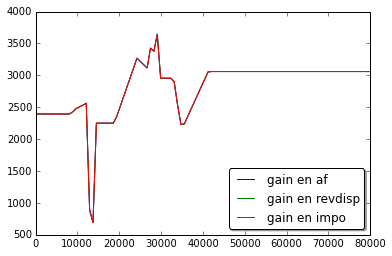

In [18]:
fig = plt.figure()
rang_enfant = 2
year = 2015
for variable in ['af', 'revdisp', 'impo']: 
    plt.plot(salaire_imposable, gain_enfant_marginal(rang_enfant, variable = variable, year = year),
             label = "gain en {}".format(variable))
plt.legend(loc = 4, shadow=True, fancybox=True)
plt.xlim([0, salaire_imposable_maximal])
